In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re      # for manipulating imported data

In [2]:
url = "https://www.hubertiming.com/results/2018MLK"  # open link
html = urlopen(url)

In [3]:
# soup = BeautifulSoup(html, "lxml")
soup = BeautifulSoup(html) # bydefault it is "lxml"

### Extracting Data

In [4]:
title = soup.title
print(title)
print(title.text)

<title>Race results for the 2018 MLK Dream Run!</title>
Race results for the 2018 MLK Dream Run!


In [5]:
# links = soup.find_all('a')
links = soup.find_all('a', href=True)

# print(links)
for link in links:
    print(link['href']) # or = print(link.get('href'))

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [6]:
allrows = soup.find_all('tr')
# allrows # gives all rows (lot of data)
allrows[:5] # first 5 rows

[<tr colspan="2">
 <b>5K:</b>
 </tr>,
 <tr>
 <td>Finishers:</td>
 <td>191</td>
 </tr>,
 <tr>
 <td>Male:</td>
 <td>78</td>
 </tr>,
 <tr>
 <td>Female:</td>
 <td>113</td>
 </tr>,
 <tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>Age</th>
 <th>City</th>
 <th>State</th>
 <th>Chip Pace</th>
 <th>Time</th>
 <th>Gender Place</th>
 <th>Age Group</th>
 <th>Age Group Place</th>
 <th>Time to Start</th>
 <th>Gun Time</th>
 </tr>]

In [7]:
for row in allrows:
    row_list = row.find_all("td")
print(row_list)

for cell in row_list:
    print(cell.text)

[<td>191</td>, <td>1216</td>, <td>

                    ZULMA OCHOA

                </td>, <td>F</td>, <td>40</td>, <td>GRESHAM</td>, <td>OR</td>, <td>33:22</td>, <td>1:43:27</td>, <td>

                    113 of 113

                </td>, <td>F 40-54</td>, <td>

                    37 of 37

                </td>, <td>0:00</td>, <td>1:43:27</td>]
191
1216


                    ZULMA OCHOA

                
F
40
GRESHAM
OR
33:22
1:43:27


                    113 of 113

                
F 40-54


                    37 of 37

                
0:00
1:43:27


In [8]:
data = []
for row in allrows:
    row_list = row.find_all("td")
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)   
data = data[4:]
print(data[-2:])

[['190', '2087', '\r\n\r\n                    LEESHA POSEY\r\n\r\n                ', 'F', '43', 'PORTLAND', 'OR', '30:17', '1:33:53', '\r\n\r\n                    112 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    36 of 37\r\n\r\n                ', '0:00', '1:33:53'], ['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


In [9]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,5:25,16:48,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
2,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,5:39,17:31,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
3,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,5:53,18:15,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
4,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,5:58,18:31,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38


In [10]:
header_list = []

col_headers = soup.find_all('th')
col_headers

for col in col_headers:
    header_list.append(col.text)

print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace', 'Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [11]:
df.columns = header_list
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,5:25,16:48,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
2,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,5:39,17:31,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
3,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,5:53,18:15,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
4,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,5:58,18:31,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            191 non-null    object
 1   Bib              191 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   State            191 non-null    object
 7   Chip Pace        191 non-null    object
 8   Time             191 non-null    object
 9   Gender Place     191 non-null    object
 10  Age Group        191 non-null    object
 11  Age Group Place  191 non-null    object
 12  Time to Start    191 non-null    object
 13  Gun Time         191 non-null    object
dtypes: object(14)
memory usage: 21.1+ KB


In [13]:
df.shape

(192, 14)

In [14]:
df2 = df.dropna(how='any')

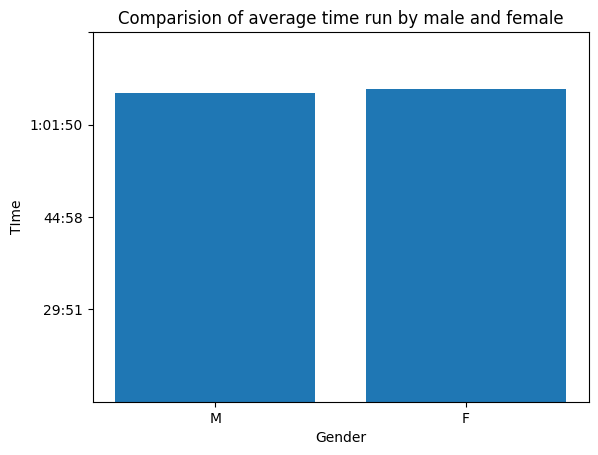

In [15]:
plt.bar(df2['Gender'], df2['Time'])
plt.xlabel("Gender")
plt.ylabel("TIme")
plt.title("Comparision of average time run by male and female")
plt.yticks([50, 100,150,200])
plt.show()

In [16]:
df2.describe()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
count,191,191,191,191,191,191,191,191,191,191,191,191,191,191
unique,191,191,190,2,55,22,6,152,170,191,9,191,45,178
top,1,1191,\r\n\r\n UNKNOWN RUNNER SEE...,F,,PORTLAND,OR,9:28,41:50,\r\n\r\n 1 of 78\r\n\r\n ...,F 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:26,40:18
freq,1,1,2,113,9,130,149,4,2,1,53,1,8,2


C:\Users\atkar\AppData\Local\Temp\ipykernel_15732\698204702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age_']  = round(pd.to_numeric(df2["Age"], errors = 'coerce'))
C:\Users\atkar\AppData\Local\Temp\ipykernel_15732\698204702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(how='any', inplace=True)


Text(0, 0.5, 'Age')

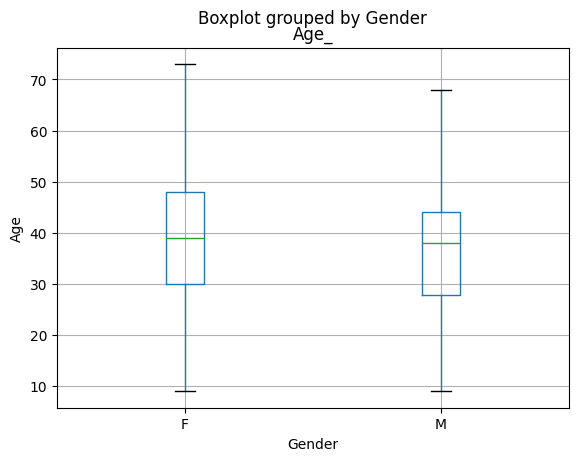

In [17]:
df2['Age_']  = round(pd.to_numeric(df2["Age"], errors = 'coerce'))
df2.dropna(how='any', inplace=True)

df2.boxplot(column='Age_', by='Gender')
plt.ylabel("Age")